## Web Crawling (Web Scrapping)

테스트용 브라우저

request
selenium

In [1]:
import pandas as pd

In [2]:
import requests

네이버 주식데이터 크롤링 하기 !
https://m.stock.naver.com

웹에서 크롤링 할 때 웹 페이지가 어렵다면 모바일 페이지에서 접근

In [5]:
def make_url(page_size=20, page=1):
    return "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize={}&page={}"\
        .format(page_size, page)

In [8]:
url = make_url(20, 1)
url

'https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSPI&pageSize=20&page=1'

In [9]:
response = requests.get(url)
response

<Response [200]>

In [11]:
kospi_json = response.json()
type(kospi_json)

dict

In [12]:
kospi = kospi_json['result']['siseList']
len(kospi)

20

In [13]:
kospi[:2]

[{'cd': 'KOSPI',
  'dt': '20200207',
  'ncv': 2211.95,
  'cv': -15.99,
  'cr': -0.72,
  'ov': 2221.49,
  'hv': 2223.92,
  'lv': 2198.14},
 {'cd': 'KOSPI',
  'dt': '20200206',
  'ncv': 2227.94,
  'cv': 62.31,
  'cr': 2.88,
  'ov': 2184.77,
  'hv': 2229.99,
  'lv': 2182.25}]

In [17]:
df = pd.DataFrame(kospi)
df.tail(2)

,cd,dt,ncv,cv,cr,ov,hv,lv
18,KOSPI,20200110,2206.39,19.94,0.91,2189.48,2206.92,2188.10
19,KOSPI,20200109,2186.45,35.14,1.63,2182.20,2186.45,2172.16


In [6]:
def get_kospi(url): 
    response = requests.get(url)
    
    kospi_json = response.json()
    
    kospi = kospi_json['result']['siseList']
    
    return pd.DataFrame(kospi)

In [7]:
url = make_url(20, 1)
kospi_df = get_kospi(url)
print(len(kospi_df))
kospi_df.tail()

20


,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSPI,20200115,2230.98,-7.90,-0.35,2229.80,2238.21,2223.39
16,KOSPI,20200114,2238.88,9.62,0.43,2243.06,2250.79,2232.94
17,KOSPI,20200113,2229.26,22.87,1.04,2204.49,2230.43,2204.49
18,KOSPI,20200110,2206.39,19.94,0.91,2189.48,2206.92,2188.10
19,KOSPI,20200109,2186.45,35.14,1.63,2182.20,2186.45,2172.16


In [8]:
# ohlcv Data : 기본 데이터

columns = {
    'cd': '시장',
    'cv': '전일대비',
    'cr':'등락률',
    'dt':'날짜',
    'hv':'고가',
    'lv':'저가',
    'ncv':'종가',
    'ov': '시가'
}

kospi_df.rename(columns=columns, inplace=True)
kospi_df.tail()

,시장,날짜,종가,전일대비,등락률,시가,고가,저가
15,KOSPI,20200115,2230.98,-7.90,-0.35,2229.80,2238.21,2223.39
16,KOSPI,20200114,2238.88,9.62,0.43,2243.06,2250.79,2232.94
17,KOSPI,20200113,2229.26,22.87,1.04,2204.49,2230.43,2204.49
18,KOSPI,20200110,2206.39,19.94,0.91,2189.48,2206.92,2188.10
19,KOSPI,20200109,2186.45,35.14,1.63,2182.20,2186.45,2172.16


In [21]:
import pickle

In [22]:
!mkdir datas

In [23]:
# w 는 일반 텍스트, wb 는 binary 형식 저장

with open('datas/kospi.pkl', 'wb') as f:
    pickle.dump(kospi_df, f)

In [13]:
%matplotlib inline

In [14]:
%config InlineBackend.figure_formant = {'png', 'retina'}

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set()

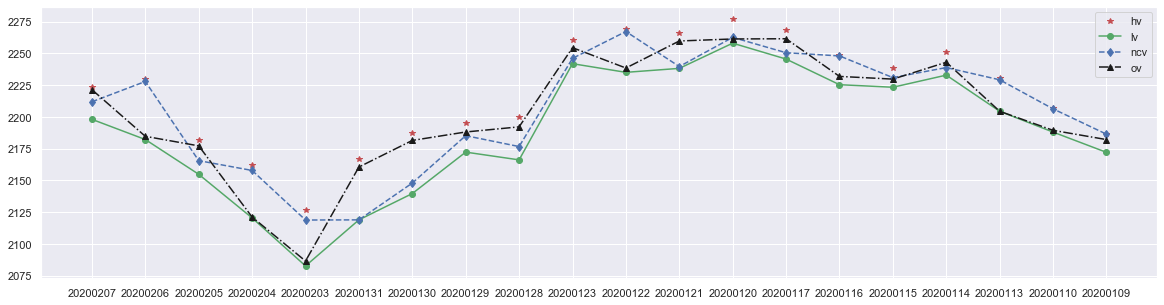

In [17]:
plt.figure(figsize=(20, 5))

plt.plot(kospi_df['날짜'], kospi_df['고가'], 'r*', label='hv')
plt.plot(kospi_df['날짜'], kospi_df['저가'], 'go-', label='lv')
plt.plot(kospi_df['날짜'], kospi_df['종가'], 'bd--', label='ncv')
plt.plot(kospi_df['날짜'], kospi_df['시가'], 'k^-.', label='ov')

plt.legend()

plt.show()

In [18]:
def make_url_(page_size=20, page=1):
    return "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?code=KOSDAQ&pageSize={}&page={}"\
        .format(page_size, page)

In [19]:
def get_kosdaq(url): 
    response = requests.get(url)
    
    kosdaq_json = response.json()
    
    kosdaq = kosdaq_json['result']['siseList']
    
    return pd.DataFrame(kosdaq)

In [20]:
url = make_url_(20, 1)
kosdaq_df = get_kosdaq(url)
print(len(kosdaq_df))
kosdaq_df.tail()

20


,cd,dt,ncv,cv,cr,ov,hv,lv
15,KOSDAQ,20200115,679.16,0.45,0.07,678.83,681.39,676.91
16,KOSDAQ,20200114,678.71,-0.51,-0.08,682.14,685.88,676.78
17,KOSDAQ,20200113,679.22,6.19,0.92,673.76,679.22,673.23
18,KOSDAQ,20200110,673.03,6.94,1.04,668.79,673.03,665.92
19,KOSDAQ,20200109,666.09,25.15,3.92,657.01,666.09,656.25


In [21]:
columns = {
    'cd': '시장',
    'cv': '전일대비',
    'cr':'등락률',
    'dt':'날짜',
    'hv':'고가',
    'lv':'저가',
    'ncv':'종가',
    'ov': '시가'
}

kosdaq_df.rename(columns=columns, inplace=True)
kosdaq_df.tail()

,시장,날짜,종가,전일대비,등락률,시가,고가,저가
15,KOSDAQ,20200115,679.16,0.45,0.07,678.83,681.39,676.91
16,KOSDAQ,20200114,678.71,-0.51,-0.08,682.14,685.88,676.78
17,KOSDAQ,20200113,679.22,6.19,0.92,673.76,679.22,673.23
18,KOSDAQ,20200110,673.03,6.94,1.04,668.79,673.03,665.92
19,KOSDAQ,20200109,666.09,25.15,3.92,657.01,666.09,656.25


In [36]:
with open('datas/kosdaq.pkl', 'wb') as f:
    pickle.dump(kosdaq_df, f)

In [ ]:
# make graph

In [29]:
def make_url__(page_size=20, page=1):
    return "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?marketIndexCd=FX_USDKRW&pageSize={}&page={}"\
        .format(page_size, page)

In [37]:
def get_exchange(url): 
#     response = requests.get(url)
    
#     exchange_json = response.json()

    exchange_json = {"result":{"marketIndexDay":[{"dt":"20200207","nv":1193.5,"cv":9.5,"cr":0.8,"cbv":1214.38,"csv":1172.62,"sv":1205.1,"rv":1181.9},{"dt":"20200206","nv":1184.0,"cv":-0.5,"cr":-0.04,"cbv":1204.72,"csv":1163.28,"sv":1195.6,"rv":1172.4},{"dt":"20200205","nv":1184.5,"cv":-4.0,"cr":-0.34,"cbv":1205.22,"csv":1163.78,"sv":1196.1,"rv":1172.9},{"dt":"20200204","nv":1188.5,"cv":-5.5,"cr":-0.46,"cbv":1209.29,"csv":1167.71,"sv":1200.1,"rv":1176.9},{"dt":"20200203","nv":1194.0,"cv":-0.5,"cr":-0.04,"cbv":1214.89,"csv":1173.11,"sv":1205.7,"rv":1182.3},{"dt":"20200131","nv":1194.5,"cv":5.5,"cr":0.46,"cbv":1215.4,"csv":1173.6,"sv":1206.2,"rv":1182.8},{"dt":"20200130","nv":1189.0,"cv":10.0,"cr":0.85,"cbv":1209.8,"csv":1168.2,"sv":1200.6,"rv":1177.4},{"dt":"20200129","nv":1179.0,"cv":-0.5,"cr":-0.04,"cbv":1199.63,"csv":1158.37,"sv":1190.5,"rv":1167.5},{"dt":"20200128","nv":1179.5,"cv":11.5,"cr":0.98,"cbv":1200.14,"csv":1158.86,"sv":1191.0,"rv":1168.0},{"dt":"20200123","nv":1168.0,"cv":3.0,"cr":0.26,"cbv":1188.44,"csv":1147.56,"sv":1179.4,"rv":1156.6},{"dt":"20200122","nv":1165.0,"cv":-2.0,"cr":-0.17,"cbv":1185.38,"csv":1144.62,"sv":1176.4,"rv":1153.6},{"dt":"20200121","nv":1167.0,"cv":6.5,"cr":0.56,"cbv":1187.42,"csv":1146.58,"sv":1178.4,"rv":1155.6},{"dt":"20200120","nv":1160.5,"cv":1.5,"cr":0.13,"cbv":1180.8,"csv":1140.2,"sv":1171.8,"rv":1149.2},{"dt":"20200117","nv":1159.0,"cv":-1.5,"cr":-0.13,"cbv":1179.28,"csv":1138.72,"sv":1170.3,"rv":1147.7},{"dt":"20200116","nv":1160.5,"cv":2.5,"cr":0.22,"cbv":1180.8,"csv":1140.2,"sv":1171.8,"rv":1149.2},{"dt":"20200115","nv":1158.0,"cv":-0.5,"cr":-0.04,"cbv":1178.26,"csv":1137.74,"sv":1169.3,"rv":1146.7},{"dt":"20200114","nv":1158.5,"cv":1.5,"cr":0.13,"cbv":1178.77,"csv":1138.23,"sv":1169.8,"rv":1147.2},{"dt":"20200113","nv":1157.0,"cv":-4.5,"cr":-0.39,"cbv":1177.24,"csv":1136.76,"sv":1168.3,"rv":1145.7},{"dt":"20200110","nv":1161.5,"cv":1.5,"cr":0.13,"cbv":1181.82,"csv":1141.18,"sv":1172.8,"rv":1150.2},{"dt":"20200109","nv":1160.0,"cv":-9.0,"cr":-0.77,"cbv":1180.3,"csv":1139.7,"sv":1171.3,"rv":1148.7}]},"resultCode":"success"}
    
    exchange = exchange_json['result']['marketIndexDay']
    
    return pd.DataFrame(exchange)

In [40]:
url = make_url__(20, 1)
exchange_df = get_exchange(url)
print(len(exchange_df))
exchange_df.tail()

20


,dt,nv,cv,cr,cbv,csv,sv,rv
15,20200115,1158.0,-0.5,-0.04,1178.26,1137.74,1169.3,1146.7
16,20200114,1158.5,1.5,0.13,1178.77,1138.23,1169.8,1147.2
17,20200113,1157.0,-4.5,-0.39,1177.24,1136.76,1168.3,1145.7
18,20200110,1161.5,1.5,0.13,1181.82,1141.18,1172.8,1150.2
19,20200109,1160.0,-9.0,-0.77,1180.30,1139.70,1171.3,1148.7


In [42]:
columns = {
    'cbv':'현찰 살 때',
    'cr':'등락율',
    'csv':'현찰팔 때',
    'cv':'전일대비',
    'dt':'날짜',
    'nv':'종가',
    'rv':'송금 받을 때',
    'sv':'송금 보낼 때'
}

exchange_df.rename(columns=columns, inplace=True)
exchange_df.head()

,날짜,종가,전일대비,등락율,현찰 살 때,현찰팔 때,송금 보낼 때,송금 받을 때
0,20200207,1193.5,9.5,0.80,1214.38,1172.62,1205.1,1181.9
1,20200206,1184.0,-0.5,-0.04,1204.72,1163.28,1195.6,1172.4
2,20200205,1184.5,-4.0,-0.34,1205.22,1163.78,1196.1,1172.9
3,20200204,1188.5,-5.5,-0.46,1209.29,1167.71,1200.1,1176.9
4,20200203,1194.0,-0.5,-0.04,1214.89,1173.11,1205.7,1182.3


In [56]:
with open('datas/exchange.pkl', 'wb') as f:
    pickle.dump(exchange_df, f)

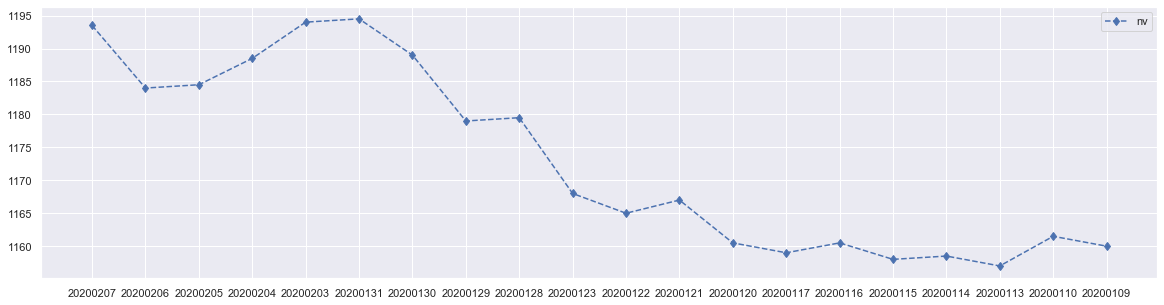

In [43]:
plt.figure(figsize=(20, 5))

plt.plot(exchange_df['날짜'], exchange_df['종가'], 'bd--', label='nv')

plt.legend()

plt.show()

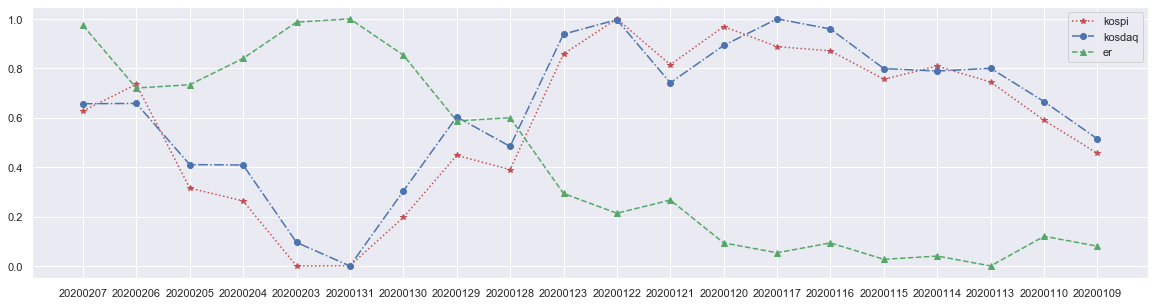

In [44]:
def nomal(data, min_scale = 0, max_scale = 1):
    nomalization = (data - data.min()) / (data.max() - data.min())
    return nomalization * (max_scale - min_scale) + min_scale

plt.figure(figsize=(20, 5))

kospi_df = kospi_df.iloc[::-1]

plt.plot(kospi_df['날짜'], nomal(kospi_df['종가']), 'r*:', label='kospi')
plt.plot(kosdaq_df['날짜'], nomal(kosdaq_df['종가']), 'bo-.', label='kosdaq')
plt.plot(exchange_df['날짜'], nomal(exchange_df['종가']), 'g^--', label='er')

plt.legend()

plt.show()

In [46]:
# 상관 계수 (연관이 있는 것뿐 인과 관계인 것은 아니다.)

import numpy as np

# np.corrcoef(nomal(kospi_df['종가']), nomal(kosdaq_df['종가']))
np.corrcoef(nomal(kospi_df['종가']), nomal(kosdaq_df['종가']))[0][1]

0.9752102767478088

## Crawling with API

https://darksky.net/dev

rkdalseod@gmail.com / rkdalseod0

token = '230a2be4007beacd62cf0426eb8c81eb'

In [53]:
def forecast(lat, lng):
    token = '230a2be4007beacd62cf0426eb8c81eb'
    url = 'https://api.darksky.net/forecast/{}/{},{}'.format(token, lat, lng)
    
    response = requests.get(url)
    weather_obj = response.json()
    return weather_obj['timezone'], weather_obj['hourly']['summary']

In [51]:
lat = 37.506168 
lng = 127.107573
forecast(lat, lng)

('Asia/Seoul', 'Clear throughout the day.')

In [54]:
df = pd.DataFrame(weather_obj['hourly']['data'])
print(len(df))
df.head()

NameError: name 'weather_obj' is not defined

In [55]:
import datetime

In [ ]:
df['time'] = df['time'].apply(datetime.datetime.fromtimestamp)
df['time']

화씨 / 섭씨
uv Index
uv Level column lambda
windBearnig
windSpeed

단위 변환은 항등원 이용

np.digitize
시작과 끝값 등록 (-1000, 1000)

weather 조합

Application 으로 데이터 전달

In [ ]:
pd.options.mode.chained_assignment = None